In [1]:
# ADP 20회 - 1년간의 온도 데이터
# 데이터 전처리 
# - 결측 / 불필요한 컬럼 제외 / 전처리완료 증명 
# - train-test set 어떻게 나눌지 설명
# randomforest 로 검증하고 예측 + 컬럼별 중요도 시각화
# SVM으로 검증하고 분석 + 컬럼별 중요도 시각화
# 최적의 모델 선택 (2개 모델의 장단점 및 선정 이유. 한계점 및 해결법)

In [2]:
import pandas as pd

In [3]:
ddf = pd.read_csv('data/temps_adp20-1.csv')

In [4]:
ddf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            348 non-null    int64  
 1   month           348 non-null    int64  
 2   day             348 non-null    int64  
 3   week            348 non-null    object 
 4   temp_2          348 non-null    int64  
 5   temp_1          348 non-null    int64  
 6   average         348 non-null    float64
 7   actual          348 non-null    int64  
 8   forecast_noaa   348 non-null    int64  
 9   forecast_acc    348 non-null    int64  
 10  forecast_under  348 non-null    int64  
 11  friend          348 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 32.8+ KB


In [5]:
ddf.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


In [6]:
ddf.tail()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
343,2016,12,27,Tues,42,42,45.2,47,41,50,47,47
344,2016,12,28,Wed,42,47,45.3,48,41,49,44,58
345,2016,12,29,Thurs,47,48,45.3,48,43,50,45,65
346,2016,12,30,Fri,48,48,45.4,57,44,46,44,42
347,2016,12,31,Sat,48,57,45.5,40,42,48,47,57


In [7]:
ddf['year'] = ddf['year'].astype('str')
ddf['month'] = ddf['month'].astype('str')
ddf['day'] = ddf['day'].astype('str')

In [8]:
ddf['date'] = ddf['year']+'-'+ddf['month']+'-'+ddf['day']

In [9]:
ddf.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,date
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29,2016-1-1
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61,2016-1-2
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56,2016-1-3
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53,2016-1-4
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41,2016-1-5


In [10]:
df= ddf.copy()
df['date'] = pd.to_datetime(df['date'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   year            348 non-null    object        
 1   month           348 non-null    object        
 2   day             348 non-null    object        
 3   week            348 non-null    object        
 4   temp_2          348 non-null    int64         
 5   temp_1          348 non-null    int64         
 6   average         348 non-null    float64       
 7   actual          348 non-null    int64         
 8   forecast_noaa   348 non-null    int64         
 9   forecast_acc    348 non-null    int64         
 10  forecast_under  348 non-null    int64         
 11  friend          348 non-null    int64         
 12  date            348 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(7), object(4)
memory usage: 35.5+ KB


In [12]:
df.tail()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,date
343,2016,12,27,Tues,42,42,45.2,47,41,50,47,47,2016-12-27
344,2016,12,28,Wed,42,47,45.3,48,41,49,44,58,2016-12-28
345,2016,12,29,Thurs,47,48,45.3,48,43,50,45,65,2016-12-29
346,2016,12,30,Fri,48,48,45.4,57,44,46,44,42,2016-12-30
347,2016,12,31,Sat,48,57,45.5,40,42,48,47,57,2016-12-31


In [13]:
# DV = actual
# IV = 그 외 

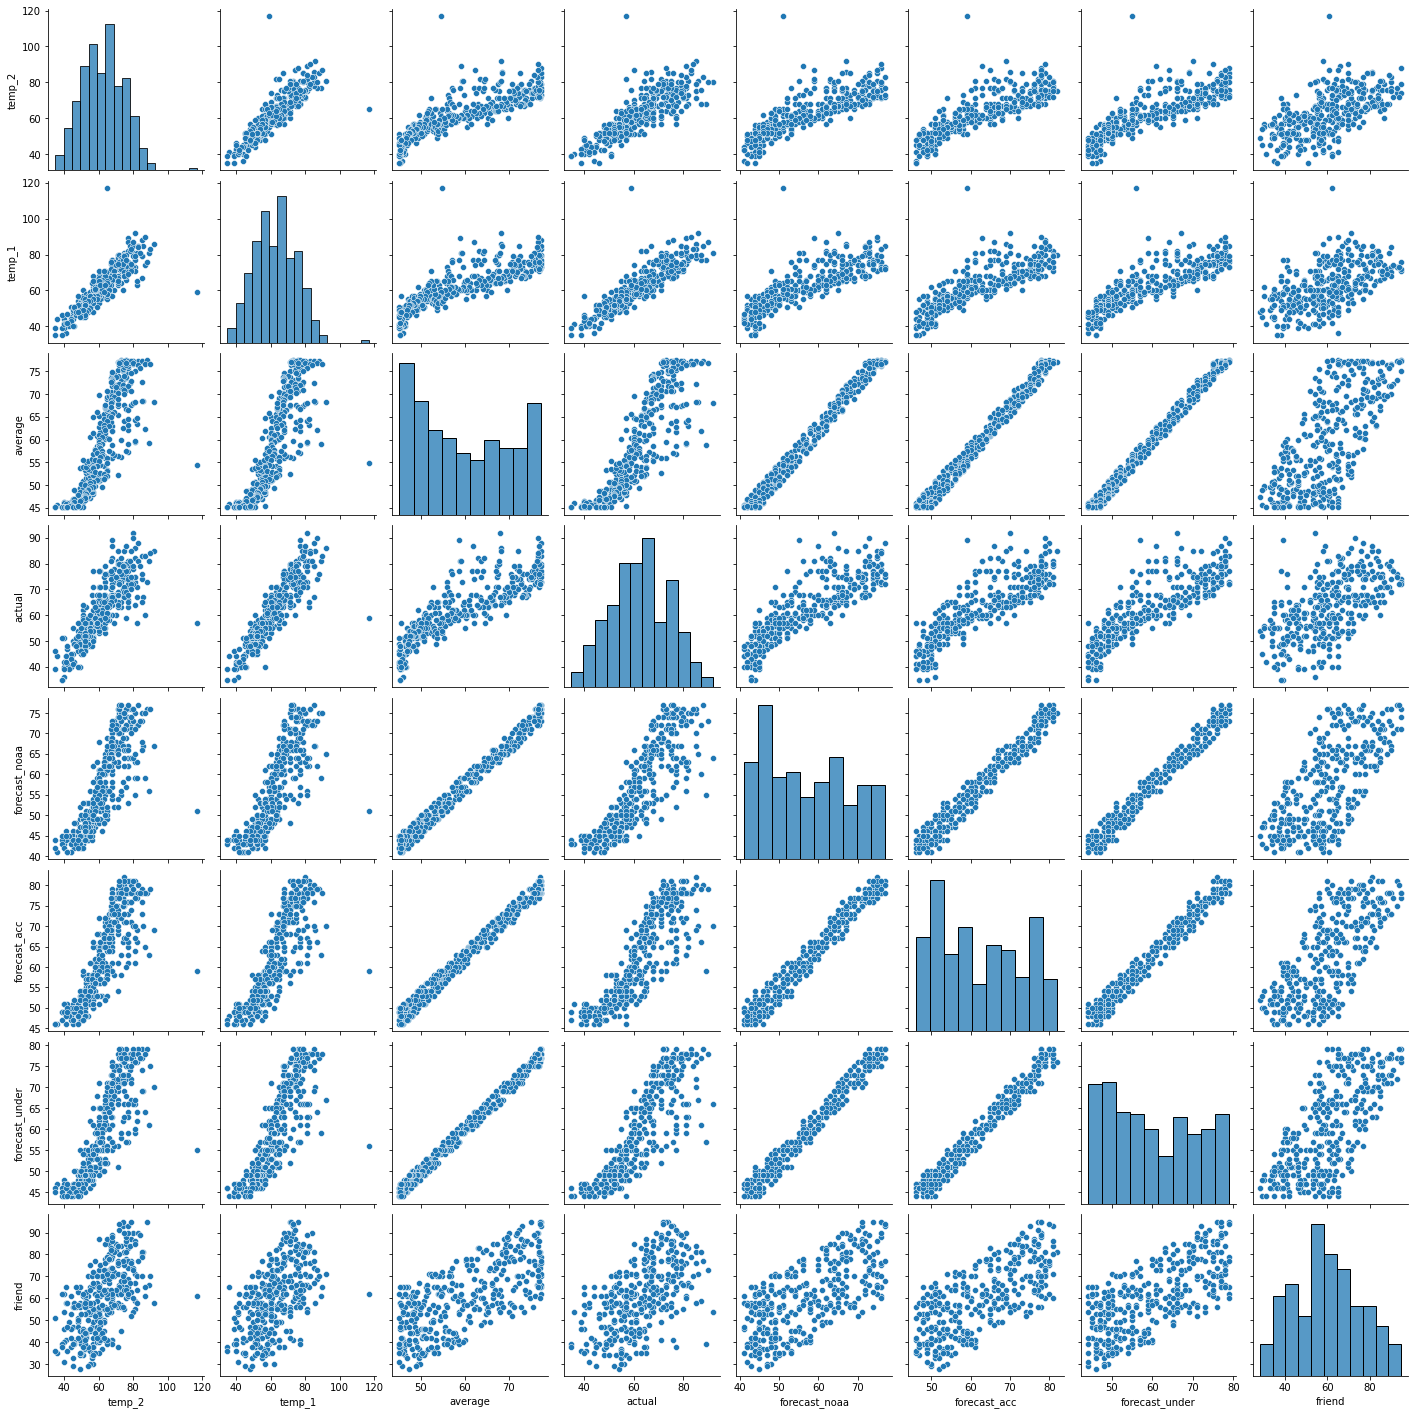

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df)

In [15]:
### 위의 플롯에 나타난 결과를 바탕으로 제외할 변수 검토 
### - forecast_under / forecast_acc / forecast_noaa 는 
###   average 와 완벽한 선형 관계를 이루고 있으므로 다중공선성 발생 우려
###   => average 만 남기고 위의 3개 변수는 제외


In [16]:
df2 = df.drop(['year','forecast_under','forecast_acc','forecast_noaa'], axis=1)

In [17]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   month    348 non-null    object        
 1   day      348 non-null    object        
 2   week     348 non-null    object        
 3   temp_2   348 non-null    int64         
 4   temp_1   348 non-null    int64         
 5   average  348 non-null    float64       
 6   actual   348 non-null    int64         
 7   friend   348 non-null    int64         
 8   date     348 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(4), object(3)
memory usage: 24.6+ KB


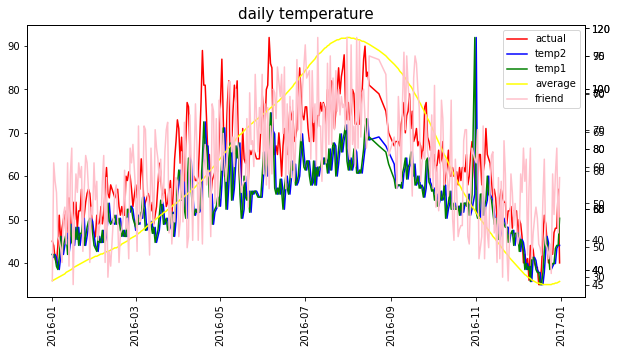

In [18]:
# 시계열데이터 lineplot (선그래프) 
# https://yganalyst.github.io/etc/visual_2/

plt.figure(figsize=(10,5))
plt.title("daily temperature", fontsize=15)
plt.xticks(rotation=90)
ax1 = plt.subplot(111)
ax2 = ax1.twinx()
ax3 = ax1.twinx()
ax4 = ax1.twinx()
ax5 = ax1.twinx()
a, =  ax1.plot(df2['date'], df2['actual'], "-", color='red', label="actual")
b, = ax2.plot(df2['date'], df2['temp_2'], "-", color='blue', label="temp2")
c, = ax3.plot(df2['date'], df2['temp_1'], "-", color='green', label="temp1")
d, = ax4.plot(df2['date'], df2['average'], "-", color='yellow', label="average")
e, = ax5.plot(df2['date'], df2['friend'], "-", color='pink', label="friend")
p = [a, b,c,d,e]

ax1.legend(p, [p_.get_label() for p_ in p])
plt.show()

In [19]:
### friend 의 변동폭이 actual / temp_1 / temp_2 보다 크므로 
### actual 예측에 부적합하다고 판단되어 제외
### temp_1과 temp_2 가 유사하게 나타나지만 2016년 8-9월경의 그래프에서 
### temp_1이 temp_2보다 actual 과 유사한 기울기를 보이므로 temp_2는 제외 

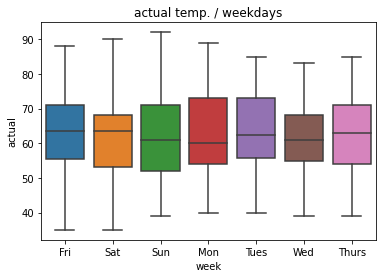

In [20]:
# https://datascienceschool.net/01%20python/05.04%20%EC%8B%9C%EB%B3%B8%EC%9D%84%20%EC%82%AC%EC%9A%A9%ED%95%9C%20%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EB%B6%84%ED%8F%AC%20%EC%8B%9C%EA%B0%81%ED%99%94.html

sns.boxplot(x="week", y="actual", data=df2)
plt.title("actual temp. / weekdays")
plt.show()
# 요일별 차이가 두드러지지 않으므로 week는 제외

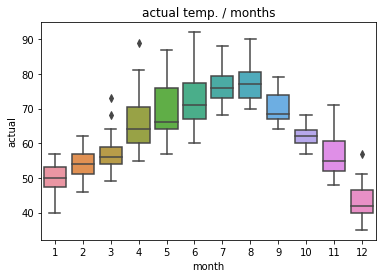

In [21]:
sns.boxplot(x="month", y="actual", data=df2)
plt.title("actual temp. / months")
plt.show()
# 월별 차이가 두드러지게 나타남

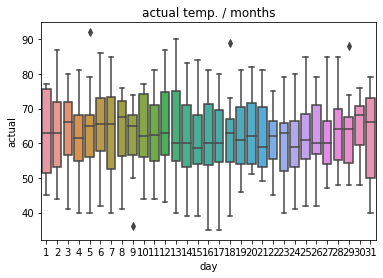

In [22]:
sns.boxplot(x="day", y="actual", data=df2)
plt.title("actual temp. / months")
plt.show()
# 날짜별 차이가 두드러지지 않음

In [23]:
# 최종 변수 선택

df_final = df2.drop(['week','day','temp_2','friend','date'], axis=1)


In [24]:
# train / test set 어떻게 나눌지 설명
### -> 월별 차이가 두드러지게 나타나므로 
###    train / test set 에 각 월별 데이터가 골고루 분포해야 함

### =>  month 를 기준으로 stratify 되도록 설정

In [25]:
from sklearn.model_selection import train_test_split

X = df_final.drop(columns=['actual'])
y = df_final['actual']
z = df_final['month']

X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=z, 
                                                   random_state=99, test_size=0.35)

In [26]:
# month 는 ojbect 이므로 더미변수화
X_train_ = pd.get_dummies(X_train)
X_test_ = pd.get_dummies(X_test)

X_train_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 226 entries, 71 to 85
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   temp_1    226 non-null    int64  
 1   average   226 non-null    float64
 2   month_1   226 non-null    uint8  
 3   month_10  226 non-null    uint8  
 4   month_11  226 non-null    uint8  
 5   month_12  226 non-null    uint8  
 6   month_2   226 non-null    uint8  
 7   month_3   226 non-null    uint8  
 8   month_4   226 non-null    uint8  
 9   month_5   226 non-null    uint8  
 10  month_6   226 non-null    uint8  
 11  month_7   226 non-null    uint8  
 12  month_8   226 non-null    uint8  
 13  month_9   226 non-null    uint8  
dtypes: float64(1), int64(1), uint8(12)
memory usage: 7.9 KB


In [27]:
# randomforest 검증 + 예측 + 컬럼별 중요도 시각화
# https://towardsdatascience.com/random-forest-in-python-24d0893d51c0


from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 1000, random_state=99)
rf.fit(X_train_, y_train)

# 예측
pred_rf = rf.predict(X_test_)

# Calculate the absolute errors
errors = abs(pred_rf - y_test)

# Print out the mean absolute error (mae)
import numpy as np
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)


# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 3.35 degrees.
Accuracy: 94.55 %.


     Feature  Importance
0     temp_1       0.492
1    average       0.483
9    month_5       0.005
3   month_10       0.004
10   month_6       0.003
8    month_4       0.003
13   month_9       0.002
11   month_7       0.002
12   month_8       0.002
4   month_11       0.001
7    month_3       0.001
2    month_1       0.001
6    month_2       0.001
5   month_12       0.001


Text(0, 0.5, 'Features')

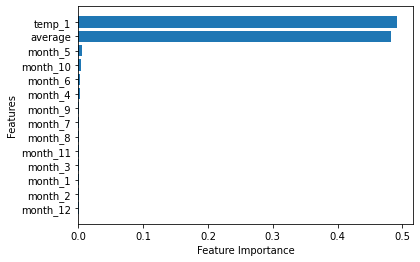

In [35]:
# rf 변수 중요도 산출
rf_importance = pd.DataFrame()
rf_importance['Feature'] = X_test_.columns # 설명변수 이름
rf_importance['Importance'] = rf.feature_importances_ # 설명변수 중요도 산출

# 변수 중요도 내림차순 정렬
rf_importance.sort_values("Importance", ascending = False, inplace = True)
print(rf_importance.round(3))

# 변수 중요도 오름차순 정렬
rf_importance.sort_values("Importance", ascending = True, inplace = True)

# 변수 중요도 시각화
coordinates = range(len(rf_importance)) # 설명변수 개수만큼 bar 시각화
plt.barh(y = coordinates, width = rf_importance["Importance"])
plt.yticks(coordinates, rf_importance["Feature"]) # y축 눈금별 설명변수 이름 기입
plt.xlabel("Feature Importance") # x축 이름
plt.ylabel("Features") # y축 이름
#plt.savefig('../figure/' + algorithm_name + '_feature_importance.png') # 변수 중요도 그래프 저장

In [36]:
# SVM 검증 + 예측 + +컬럼별 중요도 시각화

from sklearn.svm import SVR

svr = SVR()
svr.fit(X_train_, y_train)

# 예측
pred_svr = svr.predict(X_test_)

# Calculate the absolute errors
errors = abs(pred_svr - y_test)

# Print out the mean absolute error (mae)
import numpy as np
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)


# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')
print('SVR score: ', round(svr.score(X_test_, y_test)))

Mean Absolute Error: 4.4 degrees.
Accuracy: 92.71 %.
SVR score:  1


In [ ]:
# 최적의 모델 선택 (2개 모델의 장단점 및 선정 이유. 한계점 및 해결법)

### - 랜덤포레스트 정확도가 94.55%로 SVR의 정확도 92.71%보다 더 높게 나왔으나 SVR 선택이 적절하다고 판단
### - 선정이유 : 학습데이터에 과적합 되는 경우가 적고 이상치에 강하기 때문
###              파라미터를 조정하면 SVR이 더 정교한 모델을 세우고 일반화할 수 있다는 강점이 있음
### - 랜덤포레스트 
###   장점 : 파라미터 조정이 쉽고 데이터 스케일링이 필요없음
###   단점 : 차원이 크고 희소한 데이터는 성능이 안좋음 (ex.텍스트)
### - SVR 
###   장점 : 학습 데이터나 feature가 적더라도 좋은 성능을 보이고,
###          feature 개수가 많아도 효과적이며 이상치의 영향이 적고 과적합되는 경우가 적음 
###   단점 : feature scaling에 민감하고 파라미터 조절에 따라 성능이 크게 달라짐
### - SVR 의 한계점 및 해결법 
###   : 데이터 특성의 스케일링에 민감하고 최적의 모델을 찾기위해 커널과 모델을 여러가지로 조합해서 테스트해야한다는 한계점이 있지만
###    MinMaxScalar를 사용하여 feature를 정규화하고 
###    GridSearchCV를 사용하여 최적의 kernel과 최적의 parameter를 산출할수 있음